In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

## task 01

Подберите скорость обучения (alpha) и количество итераций:

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
def gradient_boost(X, y, eta, max_iter):
    n = len(y)
    W = np.random.normal(size = 2)
    eps = 1e-6 # критерий сходимости
    weight_dist = np.inf # начальная разница весов
    i = 0 # счетчик итераций
    
    while weight_dist > eps and i < max_iter:
        y_pred = W.dot(X.T)
        err = calc_mse(y, y_pred)

        W_new = W - 2 * eta * X.T.dot(X.dot(W) - y) / n
        weight_dist = np.linalg.norm(W_new - W, ord = 2)
#         eta = 1/ (i + 1)
        i += 1
        W = W_new
#     if i % 100 == 0:
#         print(i, W, err, weight_dist, weight_dist > eps)
    return W, i, err

In [5]:
etas = np.array([1e-2, 1e-4, 1e-6])
iters = np.array([1000, 10000, 100000])

In [6]:
a = []

for pair in itertools.product(etas, iters):
    W, i, err = gradient_boost(X, y, *pair)
    a.append([*pair, W, i, err])
a

[[0.01, 1000, array([47.23083321,  3.91095612]), 1000, 45.93750094158573],
 [0.01, 10000, array([47.2320499 ,  3.91073145]), 1254, 45.93750000474405],
 [0.01, 100000, array([47.23204958,  3.91073151]), 1253, 45.937500004776545],
 [0.0001, 1000, array([ 6.40608726, 10.83899528]), 1000, 942.8955668456398],
 [0.0001, 10000, array([31.59824669,  6.79763281]), 10000, 177.36861967711576],
 [0.0001,
  100000,
  array([47.22268673,  3.91246043]),
  81316,
  45.937548082887076],
 [1e-06, 1000, array([-0.44206916,  1.0314218 ]), 1000, 3153.722729785127],
 [1e-06, 10000, array([2.95964975, 3.96867628]), 10000, 1992.7563751821303],
 [1e-06, 100000, array([ 5.33378393, 11.13729152]), 100000, 989.4090951203649]]

In [7]:
# индекс элемента массива a, у которого err минимальна
ind = [params[-1] for params in a].index(min([params[-1] for params in a]))
a[ind]

[0.01, 10000, array([47.2320499 ,  3.91073145]), 1254, 45.93750000474405]

In [8]:
W = a[ind][2]
best_eta = a[ind][0]
if a[ind][1] > a[ind][3]: #алгоритм сошелся раньше, чем достигли max_iter
    best_iter = a[ind][3]
else: #алгоритм так и не сошелся при данных eta и eps
    best_iter = a[ind][1] 
    print('алгоритм не сошелся')

In [9]:
print(W, best_eta, best_iter)

[47.2320499   3.91073145] 0.01 1254


In [10]:
# шаг спуска
# eta = 1
# при eta = 1/ (i + 1) в функции градиентного спуска алгоритм сходится быстрее

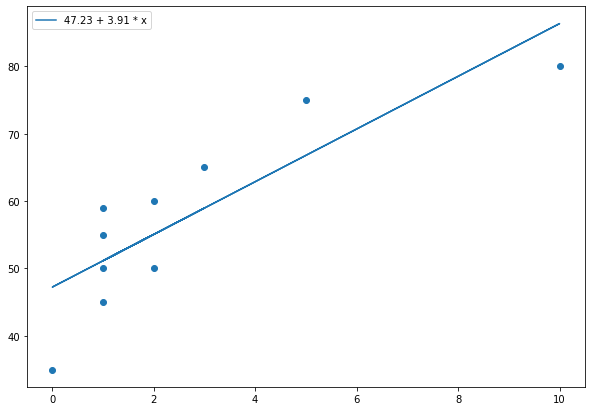

In [11]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(X.T[1], y)
plt.plot(X.T[1], W[0] + W[1] * X.T[1], label = f'{round(W[0], 2)} + {round(W[1], 2)} * x')
plt.legend()